<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_003_tensorflow_cuk_edu/_001_2/_002_text_scraping_word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Driver install 

In [65]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
chro

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [66]:
from bs4 import BeautifulSoup, builder
import datetime
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
import requests
import pandas as pd

In [67]:
!pip install konlpy

In [68]:
!python --version

Python 3.6.9


## 기사 수집에 필요한 동작과 데이터 csv 파일 전환 객체 생성


In [69]:
class TakeArticle():
    def __init__(self):
      self.df_docs = pd.DataFrame(columns=['title', 'body'])
      self.current_date = datetime.datetime.now().date()
      self.limit_month = datetime.datetime.today() - datetime.timedelta(days=3)
      self.wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

    def add_more_of_article_list(self):
      """ more 버튼 눌러서 기사 모으기 """
      self.wd.get('https://koreajoongangdaily.joins.com/section/allArticles')

      print(self.limit_month.date())
      final_article = datetime.datetime.now().date()
      # 각 기사의 url을 가져온다.
      cnt = 10
      while self.limit_month.date().__lt__(final_article):
          # print(self.limit_month.date().__lt__(final_article))
          # final_article = datetime.datetime.fromisoformat(wd.find_element_by_css_selector(  # required python by 3.8.6 
          final_article = datetime.datetime.strptime(self.wd.find_element_by_css_selector(
              '#main-second-content > div.article-left > div:nth-child(%d) > a > span.media-date > span' % cnt).text, '%Y-%m-%d').date()
          # print(final_article)
          self.wd.find_element_by_class_name('service-more-btn').click()
          # wd.find_element_by_xpath('//*[@id="article_more"]/button').click()
          time.sleep(1)
          cnt += 10

    def make_docs(self):
      """ 모은 기사 url을 기반으로 DataFrame 내용 채우기 """
      a_list = self.wd.find_elements_by_xpath('//*[@id="main-second-content"]/div[1]/div[*]/a')
      print("a list size is {}".format(len(a_list)))
      for a in a_list:
        # print(a)
        # print('href is {}'.format(a.get_attribute('href')))
        article = requests.get(a.get_attribute('href'))
        soup = BeautifulSoup(article.text, builder.HTML)
        body = soup.select_one('#article_body')
        title = body.select_one(".view-article-title.serif")
        print('title :: {}'.format(title.get_text()))
        body_text = body.get_text().replace(title.get_text(), "")
        self.df_docs = self.df_docs.append({'title': title.get_text(), 'body': body_text}, ignore_index=True)

    def make_csv(self):
      """ csv 파일로 변환하기 """
      self.df_docs.to_csv("recent_month_popular_{}.csv".format(self.current_date))


## 기사 생성 필수 데이터 생성 (객체 생성)

In [70]:
article = TakeArticle()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


## selenium을 통해 more 버튼으로 기사 생성

In [71]:
article.add_more_of_article_list()

2020-10-02


## 기사 url을 가져와 pandas DataFrame 만들기

In [72]:
article.make_docs()

a list size is 70


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


title :: Small punters are cautious about Big Hit IPO
title :: Music video for Blackpink's 'Lovesick Girls' surpasses 100 million views
title :: Millennials look to stock market as best chance for ROI
title :: Welcoming WEi
title :: SuperM's 1st studio album debuts at No. 2 on Billboard 200
title :: Chuseok travelers brought coronavirus with them
title :: LG once led Korea's bio industry — where did it all go wrong?
title :: GC completes selloff of U.S. subsidiaries for $460 million
title :: Unist researchers' wheelchair named a finalist at IDEA 2020
title :: Top envoy's husband takes off, wants a 'cruising life'
title :: Sky high
title :: French-Japanese designer Kenzo Takada dies at 81
title :: Ruling party floats alternative military service for BTS members
title :: State asks for Chun to be jailed for 18 months
title :: Gov't keeps pushing for higher debt-to-GDP ceiling
title :: Shinsegae opens Starfield in Anseong
title :: Shortage of fresh tomatoes bugs burger chains
title :: Act

## 특수문자 제거한 plain body 만들기 위한 copy

In [73]:
df_docs = pd.DataFrame.copy(article.df_docs, deep=True)

In [74]:
df_docs

,title,body
0,Small punters are cautious about Big Hit IPO,\n\n\n\n\n\n\n A customer applies for shar...
1,Music video for Blackpink's 'Lovesick Girls' s...,\n\n Girl group Blackpink [YG ENTERTAINMEN...
2,Millennials look to stock market as best chanc...,\n\n Koreans in their 20s and...
3,Welcoming WEi,\n\n Boy group WEi makes a debut Monday. [...
4,SuperM's 1st studio album debuts at No. 2 on B...,\n\n Boy band SuperM [YONHAP] ...
...,...,...
65,Google Play puts squeeze on app developers,\n\n [REUTERS] Korean IT com...
66,[SPONSORED REPORTS] Mirae Asset finds internat...,\n\n Mirae Asset’s Shanghai branch. [MIRAE...
67,'Made in Korea' becomes a must as supply chain...,\n\n As the coronavirus pandemic hit the glob...
68,"Chuseok travelers discouraged, warned to be ca...",\n\n\n\n\n\n\n Cars line the Gyeongbu Expr...


## csv 파일 생성하기 (현재 디렉터리에 날짜 형식으로 파일 생성)

In [75]:
article.make_csv()

## 특수문자 제거를 위한 정규표현 모듈 선언

In [76]:
import re

## 총 word count 생성

In [77]:
df_docs['wordCount'] = df_docs['body'].apply(lambda x: len(x.split()))

In [78]:
df_docs

,title,body,wordCount
0,Small punters are cautious about Big Hit IPO,\n\n\n\n\n\n\n A customer applies for shar...,484
1,Music video for Blackpink's 'Lovesick Girls' s...,\n\n Girl group Blackpink [YG ENTERTAINMEN...,131
2,Millennials look to stock market as best chanc...,\n\n Koreans in their 20s and...,925
3,Welcoming WEi,\n\n Boy group WEi makes a debut Monday. [...,49
4,SuperM's 1st studio album debuts at No. 2 on B...,\n\n Boy band SuperM [YONHAP] ...,228
...,...,...,...
65,Google Play puts squeeze on app developers,\n\n [REUTERS] Korean IT com...,733
66,[SPONSORED REPORTS] Mirae Asset finds internat...,\n\n Mirae Asset’s Shanghai branch. [MIRAE...,473
67,'Made in Korea' becomes a must as supply chain...,\n\n As the coronavirus pandemic hit the glob...,144
68,"Chuseok travelers discouraged, warned to be ca...",\n\n\n\n\n\n\n Cars line the Gyeongbu Expr...,656


## 특수문자 제거

In [79]:
def clean_text(txt: str) -> str:
  return re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\\n\xa0]', '', txt)

In [80]:
df_docs['plainBody'] = df_docs['body'].apply(clean_text)

In [81]:
type(df_docs.iloc[:, 3].tolist()), df_docs.iloc[:, 3].tolist()[0]

(list,
 '     A customer applies for shares in Big Hit Entertainment at NH Investment  Securities physical branch in Mapo District western Seoul Monday NEWS1              Small investors got their chance at the initial public offering IPO by Big Hit Entertainment creators of Kpop phenomenon BTS but their fervor didnt exactly reach a fever pitch — even though many were members of ARMY as BTS fans are collectively known          On the first day of subscriptions Monday 862 trillion won 743 billion in deposits were collected and the shares were oversubscribed at a rate of 896 to 1 Retail investors are being offered 20 percent of the IPO and could apply Monday and Tuesday          Last week institutional investors got their chance at 60 percent of the shares offered and they were oversubscribed 1117 times          Retail investors showed more interest in the Kakao Games IPO which closed its first day last month with a recordbreaking oversubscription of 42745 to 1          By deposits 431 t

## 불용어 제거를 위한 nltk install

In [83]:
!pip install nltk

In [ ]:
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import nltk
from nltk.corpus import stopwords
import collections

# nltk.download()

## 불용어 제거

In [85]:
words = [y for x in df_docs.iloc[:, 3].values.flatten() for y in x.split()]
stops = set(stopwords.words('english'))
no_stops = [word for word in words if not word in stops]

In [86]:
no_stops[:10]

['A',
 'customer',
 'applies',
 'shares',
 'Big',
 'Hit',
 'Entertainment',
 'NH',
 'Investment',
 'Securities']

In [ ]:
Counter(no_stops)

In [ ]:
# okt = Okt()
# okt.nouns(" ".join(words))

## 300개 단어 추출

In [91]:
result = dict(Counter(no_stops).most_common(300))

In [92]:
len(result)

300

## word cloud 생성

In [93]:
wc = WordCloud(
    # font_path="font_path",
    width=800,
    height=800,
    background_color='white'
).generate_from_frequencies(result)

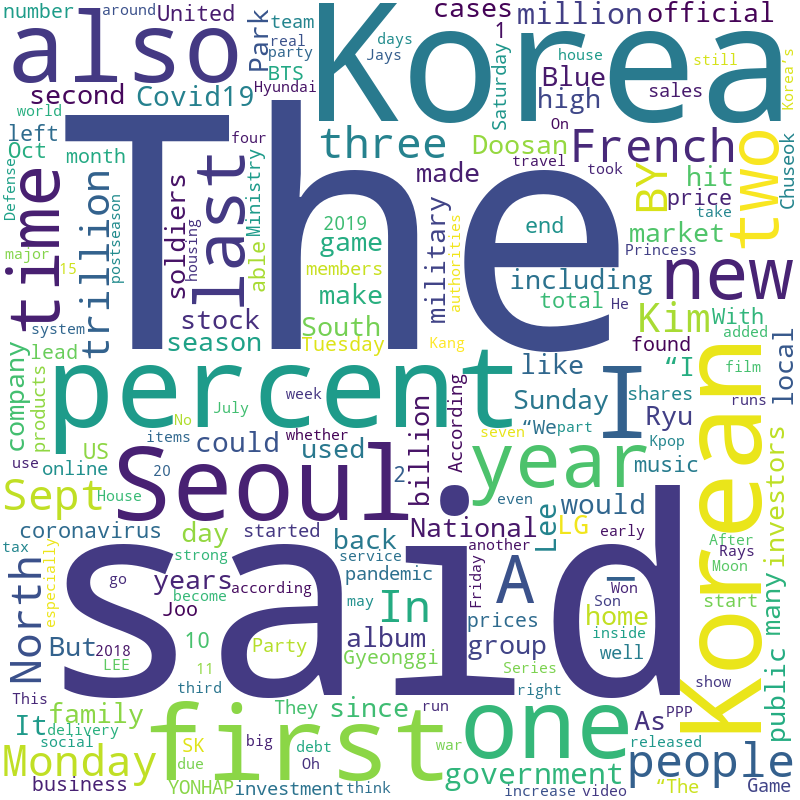

In [94]:
wc.to_image()